In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/jobs.csv',encoding = 'latin1')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Company                     3197 non-null   object
 1   Job Title                   3197 non-null   object
 2   Location                    3197 non-null   object
 3   Job Type                    3197 non-null   object
 4   Experience level            2962 non-null   object
 5   Salary                      3009 non-null   object
 6   Requirment of the company   3198 non-null   object
 7   Facilities                  3198 non-null   object
dtypes: object(8)
memory usage: 200.0+ KB


<h4>Cleanning</h4>

In [4]:
#check duplicated
data.duplicated().sum()

202

In [5]:
#remove duplicated
data.drop_duplicates(inplace=True)

In [6]:
#check null in data
data.isna().sum()

Company                         1
Job Title                       1
Location                        1
Job Type                        1
Experience level              228
Salary                        172
Requirment of the company       0
Facilities                      0
dtype: int64

In [7]:
#Drop rows null
data.drop(index=data.loc[data['Company'].isna()].index,inplace=True)

In [8]:
#Replace data null of Experience column with 'No experience'
data['Experience level'].fillna('No experience',inplace=True)

In [9]:
#Replace data null of Salary column with 'No salary'
data['Salary'].fillna('0',inplace=True)

In [10]:
import re

def cleanSalary(salary):
    currency_paterns = re.compile("["
                                  u"GBP"
                                  u"EUR"
                                  u"+"
                                  u"K"
                                  u"*"
                                  "]+",flags=re.UNICODE)

    return int(currency_paterns.sub(r'',salary))*1000
 
data['Salary'] = data['Salary'].apply(lambda x:cleanSalary(x))

In [11]:
#!pip install pycountry
import pycountry

In [12]:
def getCountryFromLocation(txt):
    for country in pycountry.countries:
        if country.name in txt or country.alpha_3 in txt:
            ctry = country.name
            break
        else:
            ctry = txt
    return ctry


data['country'] = data['Location'].apply(lambda x:getCountryFromLocation(x))

In [13]:
#Export data cleaned to csv
data.to_csv('data/cleaned_jobs.csv')

<h4>Analyse and visualization</h4>

In [14]:
from bokeh.plotting import figure,show
from bokeh.transform import cumsum
from bokeh.io import output_notebook
from bokeh.palettes import Accent6,Blues5,Category20c
import matplotlib.pyplot as plt


output_notebook()

Loading BokehJS ...

In [15]:
data = pd.read_csv('data/cleaned_jobs.csv',index_col=0)

data.head()

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities,country
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48000,"Computer Science,Data quality,Genetics,Mathema...",",,,,",United States
1,Ocorian,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48000,"Agile,Data management,Finance,Security,,",",,,,",Mauritius
2,Cricut,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,No experience,90000,"Agile,Architecture,AWS,Computer Science,Comput...","Career development,,,,",Jordan
3,Bosch Group,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48000,"Engineering,Industrial,Oracle,Power BI,R,R&D",",,,,",Italy
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108000,"AWS,Azure,Computer Science,Consulting,Dataflow...","Flex hours,Flex vacation,Parental leave,Unlimi...",United States


In [16]:
#Opportunities by country
d = data.groupby('country')['country'].count().sort_values(ascending=False).head(10).reset_index(name='counts').sort_values(by='counts',ascending=True)

#create bars
p = figure(y_range=d['country'],x_range=(0,max(d['counts'])),title=f'',tools='hover',tooltips='Opportunités : @counts')
p.hbar(y='country',right='counts',height=0.90,source=d)
show(p)

In [17]:
#Opportunities by companies
d = data.groupby('Company')['Company'].count().sort_values(ascending=False).reset_index(name='counts').head(50)
#create bars
p = figure(x_range=d['Company'],y_range=(0,max(d['counts'])),title=f'',tools='hover',tooltips='Company : @Company - Opportunités : @counts')
p.vbar(x='Company',top='counts',width=0.90,source=d)

p.xaxis.major_label_orientation = 4/-3

show(p)

In [36]:
#Job title more required
d = data.groupby('Job Title')['Job Title'].count().sort_values(ascending=False).reset_index(name='counts').rename(columns={'Job Title':'Job_Title'}).head(40)

p = figure(x_range=d['Job_Title'],y_range=(0,max(d['counts'])),title=f'',tools='hover',tooltips='Job Title : @Job_Title - Opportunités : @counts')
p.vbar(x='Job_Title',top='counts',width=0.90,source=d)

p.xaxis.major_label_orientation = 4/-3

show(p)

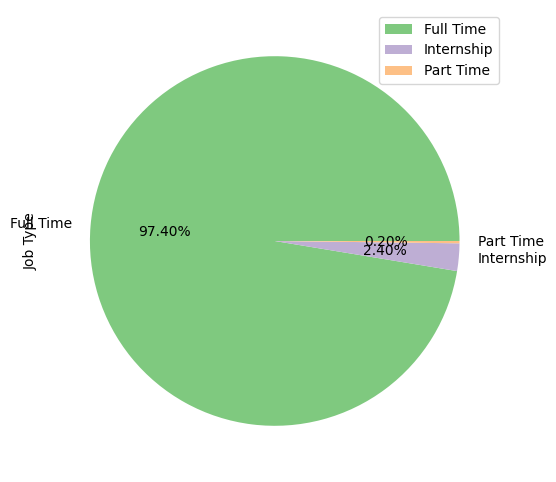

In [19]:
#Counts of opportunities by Jop Typs
d = data.groupby(by='Job Type')['Job Type'].count()

dd = pd.DataFrame(d,index=['Full Time','Internship','Part Time'])

dd.plot.pie(y='Job Type',autopct="%.2f%%", colors=Accent6,figsize=(6, 6))

plt.show()

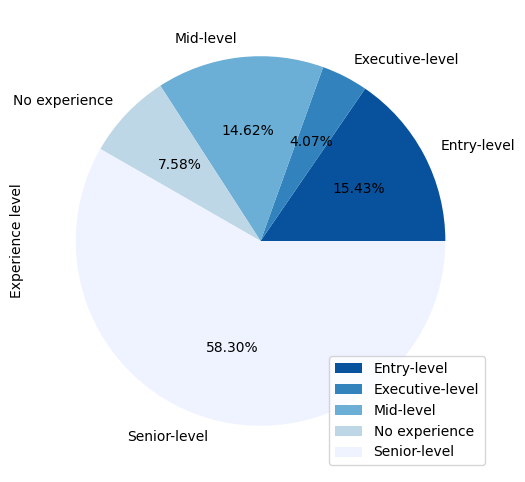

In [20]:
#Counts of opportunities by experience level
d = data.groupby('Experience level')['Experience level'].count()

dd = pd.DataFrame(d,index=['Entry-level','Executive-level','Mid-level','No experience','Senior-level'])

dd.plot.pie(y='Experience level',autopct="%.2f%%", colors=Blues5,figsize=(6, 6))

plt.show()